In [71]:
import pandas as pd

# 그래프, 한글 설정
# 출처 : https://wikidocs.net/4767
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# EUC-KR 은 KS X 1001와 KS X 1003을 사용하는 8비트 문자 인코딩, EUC의 일종이며 대표적인 한글 완성형 인코딩임
# 해당 파일을 utf-8로 설정 시 오류가 나서 euc-kr로 설정
shopping = pd.read_csv('shopping.csv', encoding = 'euc-kr')
notshopping = pd.read_csv('notshopping.csv')

# 필요한 컬럼들만 선택
#shopping = raw_shopping[['ID', 'GENDER', 'AGE_PRD', 'DE_DT', 'DE_HR', 'BIZ_UNIT.x', 'PD_S_C', 'PD_H_NM', 'PD_M_NM', 'PD_S_NM', 'BUY_CT', 'BUY_AM']]
#notshopping = raw_notshopping[['ID', 'GENDER', 'AGE_PRD', 'BIZ_UNIT', 'CRYM', 'U_AM', 'U_CT']]

In [72]:
# shopping 자료의 년월일 별로 적혀있던 날을 년월로 바꿈
for i in range(1,13):
    month = int('2015{0:02d}'.format(i))
    for j in range(1,32):
        day = int('2015{0:02d}{1:02d}'.format(i,j))
        shopping['DE_DT'].replace({day:month}, inplace=True)

# 2014년 12월 자료는 필요없으니 삭제
for i in range(20141229, 20141232):
    shopping = shopping.drop(shopping[shopping.DE_DT == i].index)

In [73]:
## 성별로 구분

# 남자만
male = shopping[shopping['GENDER'] == 1]
n_male = notshopping[notshopping['GENDER'] == 1]

#여자만
female = shopping[shopping['GENDER'] == 2]
n_female = notshopping[notshopping['GENDER'] == 2]

In [74]:
#성별간 나이대로 구분
#남자 20대~60대
M_20 = male[male['AGE_PRD'] == '20PRD']
M_30 = male[male['AGE_PRD'] == '30PRD']
M_40 = male[male['AGE_PRD'] == '40PRD']
M_50 = male[male['AGE_PRD'] == '50PRD']
M_60 = male[male['AGE_PRD'] == '60PRD']

n_M_20 = n_male[n_male['AGE_PRD'] == '20PRD']
n_M_30 = n_male[n_male['AGE_PRD'] == '30PRD']
n_M_40 = n_male[n_male['AGE_PRD'] == '40PRD']
n_M_50 = n_male[n_male['AGE_PRD'] == '50PRD']
n_M_60 = n_male[n_male['AGE_PRD'] == '60PRD']

In [75]:
#여자 20대~60대
F_20 = female[female['AGE_PRD'] == '20PRD']
F_30 = female[female['AGE_PRD'] == '30PRD']
F_40 = female[female['AGE_PRD'] == '40PRD']
F_50 = female[female['AGE_PRD'] == '50PRD']
F_60 = female[female['AGE_PRD'] == '60PRD']

n_F_20 = n_female[n_female['AGE_PRD'] == '20PRD']
n_F_30 = n_female[n_female['AGE_PRD'] == '30PRD']
n_F_40 = n_female[n_female['AGE_PRD'] == '40PRD']
n_F_50 = n_female[n_female['AGE_PRD'] == '50PRD']
n_F_60 = n_female[n_female['AGE_PRD'] == '60PRD']

In [76]:
# 전체 연령별
total_20 = shopping[shopping['AGE_PRD'] == '20PRD']
total_30 = shopping[shopping['AGE_PRD'] == '30PRD']
total_40 = shopping[shopping['AGE_PRD'] == '40PRD']
total_50 = shopping[shopping['AGE_PRD'] == '50PRD']
total_60 = shopping[shopping['AGE_PRD'] == '60PRD']

n_total_20 = notshopping[notshopping['AGE_PRD'] == '20PRD']
n_total_30 = notshopping[notshopping['AGE_PRD'] == '30PRD']
n_total_40 = notshopping[notshopping['AGE_PRD'] == '40PRD']
n_total_50 = notshopping[notshopping['AGE_PRD'] == '50PRD']
n_total_60 = notshopping[notshopping['AGE_PRD'] == '60PRD']

In [77]:
# gender = 성별 선택, group = 어느 기준으로 그룹화할건지, criteria = 어느 요소기준으로 정렬할건지
def group_sum(gender, group, criteria):
    result = gender.groupby(group).sum().sort_values(by=criteria, ascending=False)
    return result[criteria]

In [9]:
### 총판매금액
## shopping
# 남자 나이대별 총구매액
group_sum(male, 'AGE_PRD', 'BUY_AM')

AGE_PRD
50PRD    10211236284
40PRD     7995915596
30PRD     7349166721
60PRD     5798992463
20PRD     1833708455
Name: BUY_AM, dtype: int64

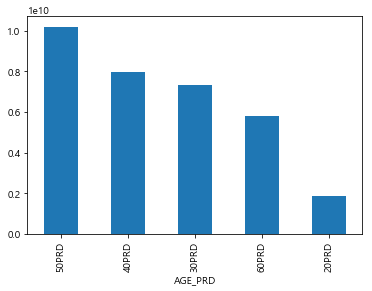

In [135]:
# 남자 나이대별 총구매액
group_sum(male, 'AGE_PRD', 'BUY_AM').plot(kind='bar')

In [9]:
# 여자 나이대별 총구매액
group_sum(female, 'AGE_PRD', 'BUY_AM')

AGE_PRD
50PRD    18660621442
40PRD    13910402525
60PRD    11475668360
30PRD    10668893174
20PRD     2419182703
Name: BUY_AM, dtype: int64

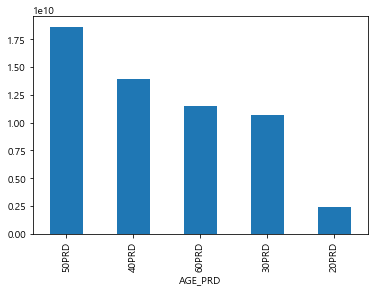

In [133]:
# 여자 나이대별 총구매액
group_sum(female, 'AGE_PRD', 'BUY_AM').plot(kind='bar')

In [10]:
# 남자+여자 나이대별 총구매액
group_sum(shopping, 'AGE_PRD', 'BUY_AM')

AGE_PRD
50PRD    28882821622
40PRD    21919910664
30PRD    18027935682
60PRD    17280892249
20PRD     4254370565
Name: BUY_AM, dtype: int64

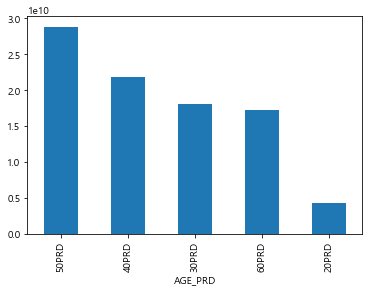

In [132]:
# 남자+여자 나이대별 총구매액
group_sum(shopping, 'AGE_PRD', 'BUY_AM').plot(kind='bar')

In [11]:
## notshopping
# 남자 나이대별 총구매액
group_sum(n_male, 'AGE_PRD', 'U_AM')

AGE_PRD
40PRD    1487373225
50PRD    1196929394
30PRD    1116330497
60PRD     987416781
20PRD     393339114
Name: U_AM, dtype: int64

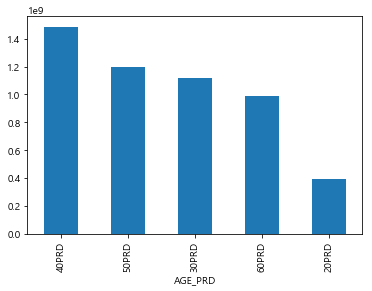

In [131]:
## notshopping
# 남자 나이대별 총구매액
group_sum(n_male, 'AGE_PRD', 'U_AM').plot(kind='bar')

In [12]:
# 여자 나이대별 총구매액
group_sum(n_female, 'AGE_PRD', 'U_AM')

AGE_PRD
50PRD    1665142526
30PRD    1654876520
60PRD    1589303536
40PRD    1578091071
20PRD     506775558
Name: U_AM, dtype: int64

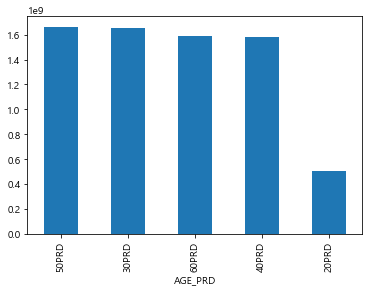

In [130]:
# 여자 나이대별 총구매액
group_sum(n_female, 'AGE_PRD', 'U_AM').plot(kind='bar')

In [13]:
# 남자+여자 나이대별 총구매액
group_sum(notshopping, 'AGE_PRD', 'U_AM')

AGE_PRD
40PRD    3065464296
50PRD    2862071920
30PRD    2771207017
60PRD    2576720317
20PRD     900114672
Name: U_AM, dtype: int64

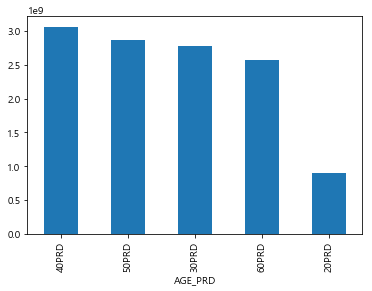

In [129]:
# 남자+여자 나이대별 총구매액
group_sum(notshopping, 'AGE_PRD', 'U_AM').plot(kind='bar')

In [119]:
### 어떤 품목이 많이 팔렸나? (상위 20개)
## shopping만
# 남자 모든연령 많이 팔린 품목
group_sum(male, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         2809233
기능성웰빙돼지고기      2403524
호주산목초비육        1193990
감자              664725
호주산곡물비육         648151
노지감귤            526669
한우정육            463862
미국산초이스등급소고기     446043
미국산냉동소고기        303184
국산꽃게            293688
Name: BUY_CT, dtype: int64

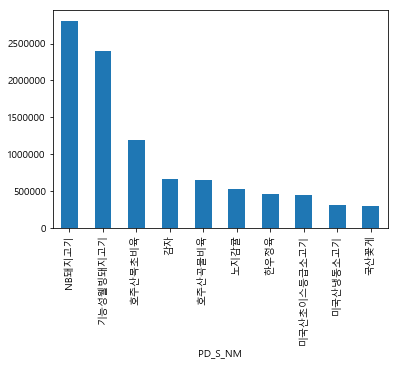

In [126]:
# 남자 모든연령 많이 팔린 품목
group_sum(male, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [121]:
# 여자 모든연령 많이 팔린 품목
group_sum(female, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         4173325
기능성웰빙돼지고기      4157723
호주산목초비육        2283451
호주산곡물비육        1072208
감자              998468
한우정육            805055
미국산냉동소고기        784319
미국산초이스등급소고기     764552
노지감귤            746352
국산꽃게            562635
Name: BUY_CT, dtype: int64

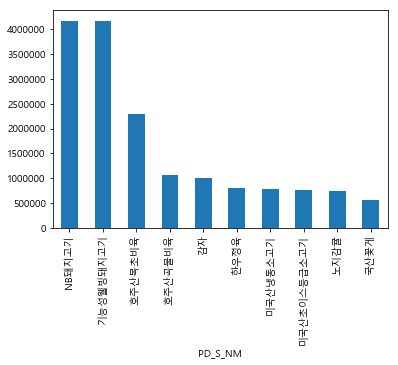

In [125]:
# 여자 모든연령 많이 팔린 품목
group_sum(female, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [16]:
# 남자+여자 모든연령 많이 팔린 품목
group_sum(shopping, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         7092173
기능성웰빙돼지고기      6607470
호주산목초비육        3504804
호주산곡물비육        1741057
감자             1673293
노지감귤           1312144
한우정육           1277194
미국산초이스등급소고기    1214967
미국산냉동소고기       1095462
국산꽃게            856327
칠레청포도           728386
소양념육            679190
진심한우            640975
한우등심            578733
연근              472609
칠레적포도           453776
일반바나나           427462
호주산흑소           381189
브랜드             349424
흰다리새우           320847
Name: BUY_CT, dtype: int64

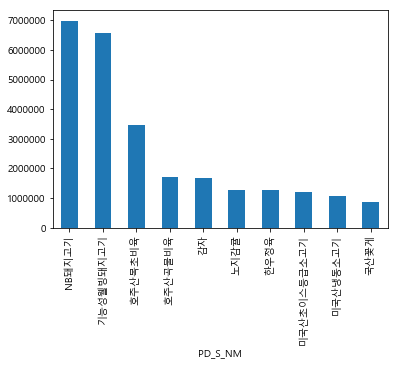

In [124]:
# 남자+여자 모든연령 많이 팔린 품목
group_sum(shopping, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [136]:
# 남자 연령별 많이 팔린 제품  -> 코드 다시 짜봐야할것같음..
#male.groupby(['AGE_PRD', 'PD_S_NM']).sum().sort_values(by=['AGE_PRD', 'BUY_CT'],ascending=False)
#group_sum(male, ['AGE_PRD', 'PD_S_NM'], ['AGE_PRD', 'BUY_CT'])

# 남자 나이대별 많이 팔린 품목
group_sum(M_20, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      137407
NB돼지고기         127052
미국산초이스등급소고기     36565
호주산곡물비육         33222
감자              30287
노지감귤            26033
호주산목초비육         21413
칠레청포도           15816
맥시코산돼지고기        15006
일반바나나           12629
Name: BUY_CT, dtype: int64

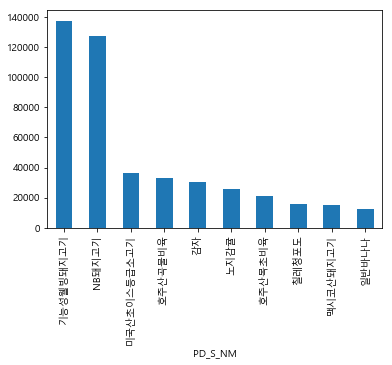

In [137]:
# 남자 연령별 많이 팔린 제품  -> 코드 다시 짜봐야할것같음..
#male.groupby(['AGE_PRD', 'PD_S_NM']).sum().sort_values(by=['AGE_PRD', 'BUY_CT'],ascending=False)
#group_sum(male, ['AGE_PRD', 'PD_S_NM'], ['AGE_PRD', 'BUY_CT'])

# 남자 나이대별 많이 팔린 품목
group_sum(M_20, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [138]:
group_sum(M_30, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         692832
기능성웰빙돼지고기      499022
호주산목초비육        239861
감자             194761
노지감귤           126966
호주산곡물비육        124472
미국산초이스등급소고기     81333
한우정육            80697
한우등심            68605
소양념육            62435
Name: BUY_CT, dtype: int64

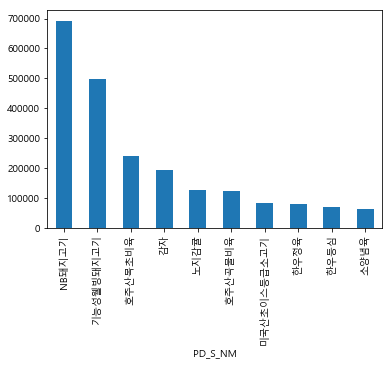

In [139]:
group_sum(M_30, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [140]:
group_sum(M_40, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         1062218
기능성웰빙돼지고기       680568
호주산목초비육         354123
호주산곡물비육         250161
감자              196704
한우정육            158705
노지감귤            133117
미국산초이스등급소고기     131660
한우등심            103698
칠레청포도            91639
Name: BUY_CT, dtype: int64

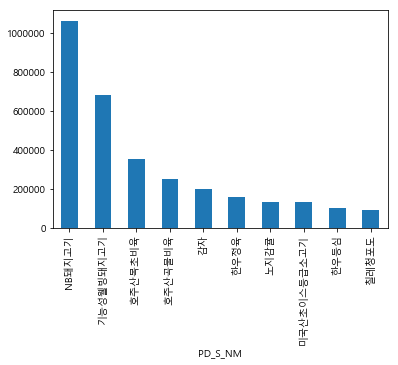

In [143]:
group_sum(M_40, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [144]:
group_sum(M_50, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      728549
NB돼지고기         600983
호주산목초비육        324856
노지감귤           165074
호주산곡물비육        151504
감자             135775
미국산초이스등급소고기    127642
한우정육           121660
국산꽃게           100352
미국산냉동소고기        97032
Name: BUY_CT, dtype: int64

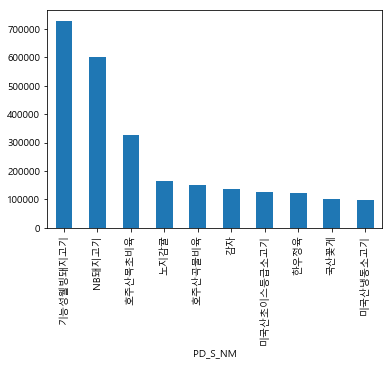

In [145]:
group_sum(M_50, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [146]:
group_sum(M_60, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      357978
NB돼지고기         326148
호주산목초비육        253737
감자             107198
한우정육            91744
호주산곡물비육         88792
노지감귤            75479
미국산냉동소고기        72811
미국산초이스등급소고기     68843
연근              52700
Name: BUY_CT, dtype: int64

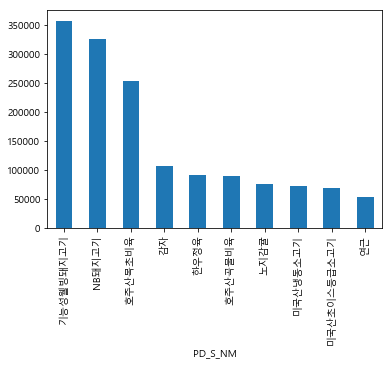

In [147]:
group_sum(M_60, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [148]:
# 여자 나이대별 많이 팔린 품목
group_sum(F_20, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      252154
NB돼지고기         149748
감자              49388
호주산곡물비육         48826
노지감귤            31803
호주산목초비육         27903
일반바나나           25348
미국산초이스등급소고기     24597
국산꽃게            22651
칠레청포도           17564
Name: BUY_CT, dtype: int64

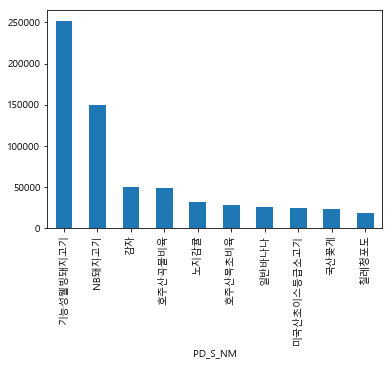

In [149]:
# 여자 나이대별 많이 팔린 품목
group_sum(F_20, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [150]:
group_sum(F_30, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      775100
NB돼지고기         770989
호주산목초비육        345159
감자             208423
호주산곡물비육        165680
노지감귤           162247
칠레청포도          118132
한우정육           117817
미국산초이스등급소고기    113147
소양념육           106187
Name: BUY_CT, dtype: int64

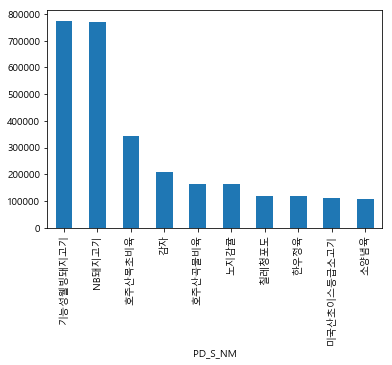

In [151]:
group_sum(F_30, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [152]:
group_sum(F_40, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         1368341
기능성웰빙돼지고기      1253649
호주산목초비육         529429
호주산곡물비육         302684
감자              282000
미국산초이스등급소고기     232850
한우정육            229035
미국산냉동소고기        200888
노지감귤            174315
국산꽃게            151892
Name: BUY_CT, dtype: int64

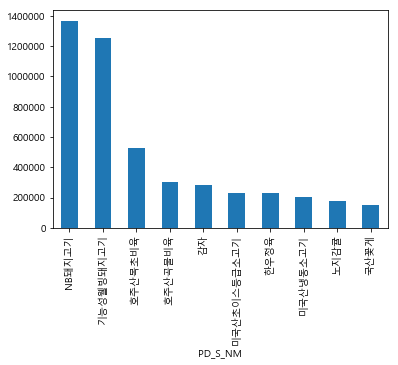

In [153]:
group_sum(F_40, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [25]:
group_sum(F_50, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         1376142
기능성웰빙돼지고기      1322162
호주산목초비육         781687
호주산곡물비육         332070
미국산냉동소고기        307190
감자              296975
노지감귤            279346
한우정육            264472
미국산초이스등급소고기     256035
국산꽃게            195184
소양념육            160496
칠레청포도           138229
진심한우            130975
연근              123474
칠레적포도           103248
한우등심             99478
일반바나나            80591
생굴               77954
맥시코산돼지고기         76361
한우양지             73125
Name: BUY_CT, dtype: int64

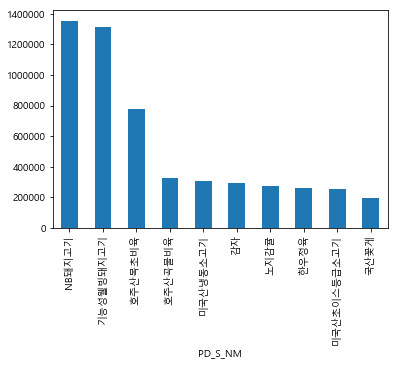

In [154]:
group_sum(F_50, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [155]:
group_sum(F_60, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
호주산목초비육        605529
기능성웰빙돼지고기      564719
NB돼지고기         529108
호주산곡물비육        228726
미국산냉동소고기       212300
한우정육           181992
감자             164160
미국산초이스등급소고기    140909
국산꽃게           114877
노지감귤           107189
Name: BUY_CT, dtype: int64

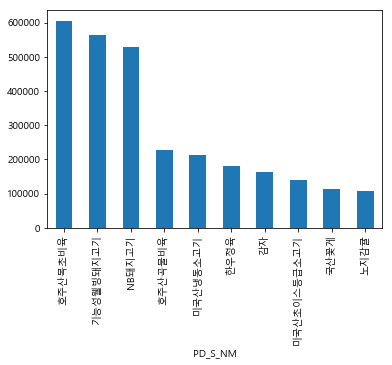

In [156]:
group_sum(F_60, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [157]:
# 남자+여자 나이대별 많이 팔린 품목
group_sum(total_20, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      389561
NB돼지고기         276800
호주산곡물비육         82048
감자              79675
미국산초이스등급소고기     61162
노지감귤            57836
호주산목초비육         49316
일반바나나           37977
국산꽃게            33738
칠레청포도           33380
Name: BUY_CT, dtype: int64

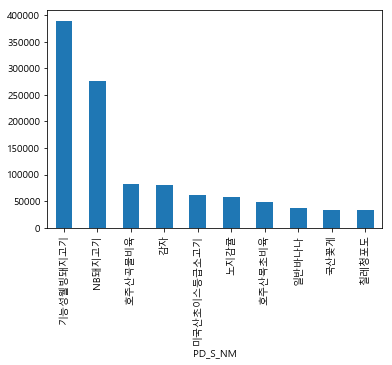

In [158]:
# 남자+여자 나이대별 많이 팔린 품목
group_sum(total_20, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [159]:
group_sum(total_30, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         1463821
기능성웰빙돼지고기      1274122
호주산목초비육         585020
감자              403184
호주산곡물비육         290152
노지감귤            289213
한우정육            198514
미국산초이스등급소고기     194480
칠레청포도           169147
소양념육            168622
Name: BUY_CT, dtype: int64

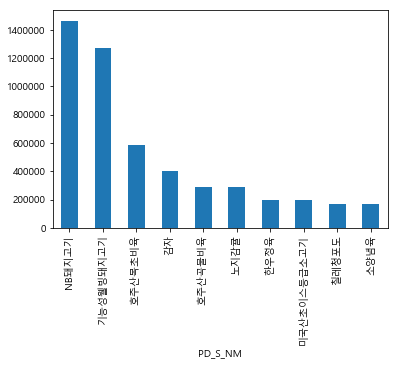

In [160]:
group_sum(total_30, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [161]:
group_sum(total_40, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
NB돼지고기         2430559
기능성웰빙돼지고기      1934217
호주산목초비육         883552
호주산곡물비육         552845
감자              478704
한우정육            387740
미국산초이스등급소고기     364510
노지감귤            307432
미국산냉동소고기        283233
국산꽃게            235955
Name: BUY_CT, dtype: int64

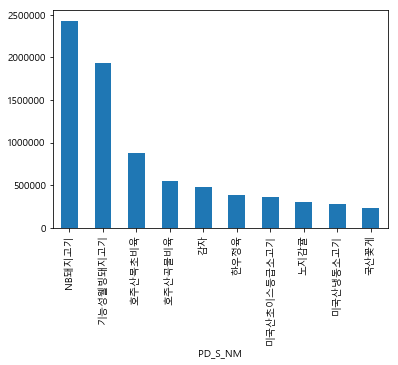

In [162]:
group_sum(total_40, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [163]:
group_sum(total_50, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      2040650
NB돼지고기         1956122
호주산목초비육        1100287
호주산곡물비육         477796
노지감귤            435872
감자              430272
미국산냉동소고기        404220
한우정육            382959
미국산초이스등급소고기     380691
국산꽃게            295536
Name: BUY_CT, dtype: int64

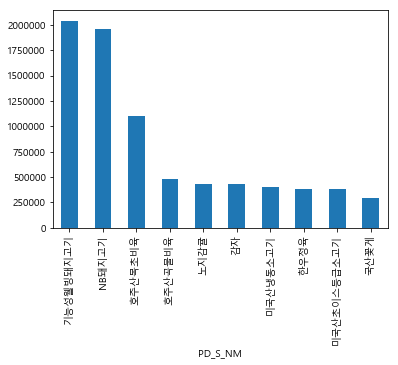

In [164]:
group_sum(total_50, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [165]:
group_sum(total_60, 'PD_S_NM', 'BUY_CT').iloc[:10]

PD_S_NM
기능성웰빙돼지고기      922697
호주산목초비육        859266
NB돼지고기         855256
호주산곡물비육        317518
미국산냉동소고기       285111
한우정육           273736
감자             271358
미국산초이스등급소고기    209752
노지감귤           182668
국산꽃게           157019
Name: BUY_CT, dtype: int64

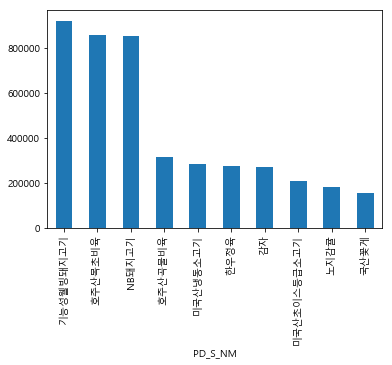

In [166]:
group_sum(total_60, 'PD_S_NM', 'BUY_CT').iloc[:10].plot(kind='bar')

In [167]:
### 어떤 업종에서 많이 팔렸나 (shopping, notshopping)

# gender = 성별 선택, group = 어느 기준으로 그룹화할건지, criteria = 어느 요소기준으로 정렬할건지
#def group_count(gender, group, criteria):
#    result = gender.groupby(group).count().sort_values(by=criteria, ascending=False)
#    return result[criteria]

def count(gender_age, criteria):
    return gender_age[criteria].value_counts()

In [168]:
## shopping
# 남자 모든연령 많이 이용한 업종
count(male, 'BIZ_UNIT.x')

A02    645301
A01    300497
A03    249087
A04    107620
A05      5829
Name: BIZ_UNIT.x, dtype: int64

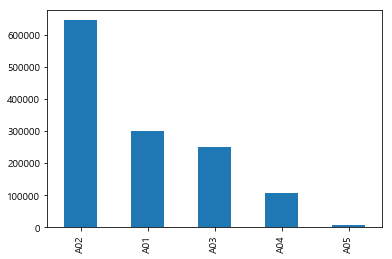

In [169]:
## shopping
# 남자 모든연령 많이 이용한 업종
count(male, 'BIZ_UNIT.x').plot(kind='bar')

In [34]:
# 여자 모든연령 많이 이용한 업종
count(female, 'BIZ_UNIT.x')

A02    1076295
A01     632216
A03     505201
A04      97088
A05      16452
Name: BIZ_UNIT.x, dtype: int64

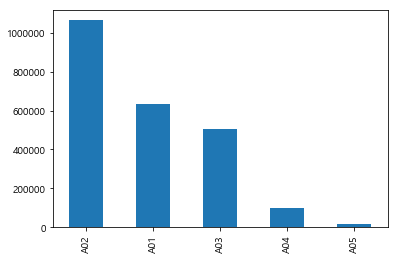

In [170]:
# 여자 모든연령 많이 이용한 업종
count(female, 'BIZ_UNIT.x').plot(kind='bar')

In [35]:
# 남자+여자 모든연령 많이 이용한 업종
count(shopping, 'BIZ_UNIT.x')

A02    1727092
A01     932713
A03     754288
A04     204708
A05      22281
Name: BIZ_UNIT.x, dtype: int64

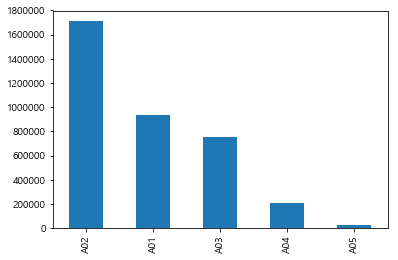

In [171]:
# 남자+여자 모든연령 많이 이용한 업종
count(shopping, 'BIZ_UNIT.x').plot(kind='bar')

In [36]:
## notshopping
# 남자 모든연령 많이 이용한 업종
count(n_male, 'BIZ_UNIT')

C01    24804
D01    16976
D03    15334
B03     7316
C02     4928
B01     1963
D02     1290
C03      299
B02       25
Name: BIZ_UNIT, dtype: int64

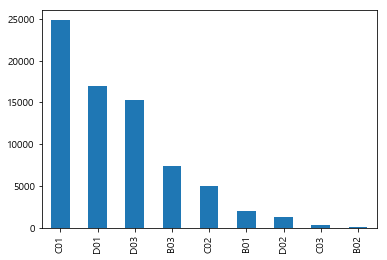

In [172]:
## notshopping
# 남자 모든연령 많이 이용한 업종
count(n_male, 'BIZ_UNIT').plot(kind='bar')

In [37]:
# 여자 모든연령 많이 이용한 업종
count(n_female, 'BIZ_UNIT')

C01    35235
D01    25781
D03    22857
B03    10319
C02     7668
D02     1822
B01     1794
C03      204
B02       44
Name: BIZ_UNIT, dtype: int64

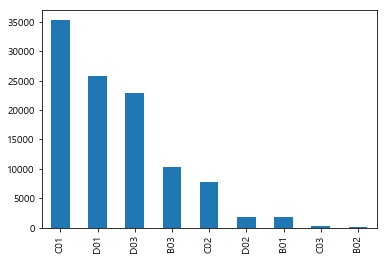

In [173]:
# 여자 모든연령 많이 이용한 업종
count(n_female, 'BIZ_UNIT').plot(kind='bar')

In [38]:
# 남자+여자 모든연령 많이 이용한 업종
count(notshopping, 'BIZ_UNIT')

C01    60039
D01    42757
D03    38191
B03    17635
C02    12596
B01     3757
D02     3112
C03      503
B02       69
Name: BIZ_UNIT, dtype: int64

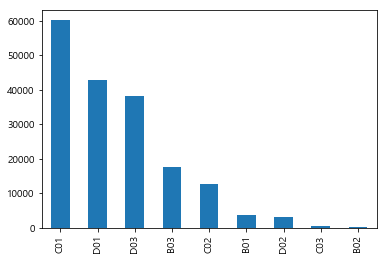

In [174]:
# 남자+여자 모든연령 많이 이용한 업종
count(notshopping, 'BIZ_UNIT').plot(kind='bar')

In [176]:
# 남자 연령대별로 많이 이용한 업종
count(M_20, 'BIZ_UNIT.x')

A02    31994
A04    18743
A01    18243
A03    10892
A05     1207
Name: BIZ_UNIT.x, dtype: int64

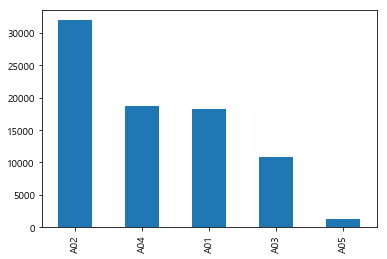

In [175]:
# 남자 연령대별로 많이 이용한 업종
count(M_20, 'BIZ_UNIT.x').plot(kind='bar')

In [40]:
count(M_30, 'BIZ_UNIT.x')

A02    165495
A01     60771
A03     59524
A04     41043
A05      1596
Name: BIZ_UNIT.x, dtype: int64

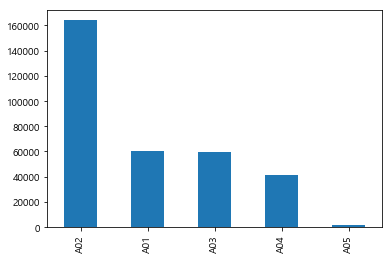

In [177]:
count(M_30, 'BIZ_UNIT.x').plot(kind='bar')

In [41]:
count(M_40, 'BIZ_UNIT.x')

A02    209310
A03     89129
A01     78480
A04     35326
A05      1658
Name: BIZ_UNIT.x, dtype: int64

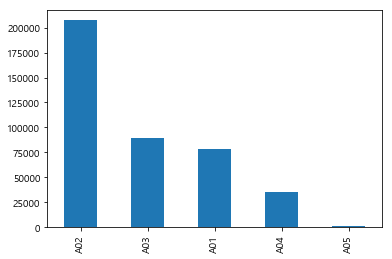

In [178]:
count(M_40, 'BIZ_UNIT.x').plot(kind='bar')

In [42]:
count(M_50, 'BIZ_UNIT.x')

A02    157155
A01     87677
A03     61833
A04     10268
A05      1027
Name: BIZ_UNIT.x, dtype: int64

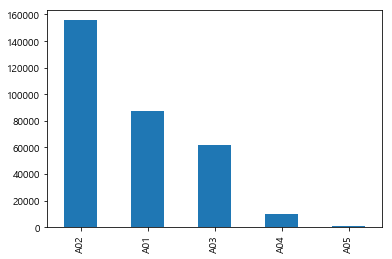

In [179]:
count(M_50, 'BIZ_UNIT.x').plot(kind='bar')

In [43]:
count(M_60, 'BIZ_UNIT.x')

A02    86641
A01    55326
A03    27709
A04     2240
A05      341
Name: BIZ_UNIT.x, dtype: int64

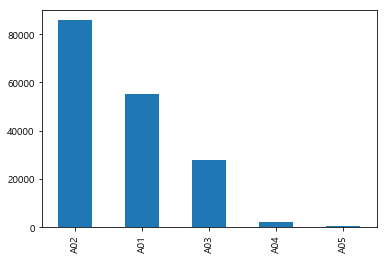

In [180]:
count(M_60, 'BIZ_UNIT.x').plot(kind='bar')

In [44]:
# 여자 연령대별로 많이 이용한 업종
count(F_20, 'BIZ_UNIT.x')

A02    52356
A01    33952
A03    20357
A04    10097
A05     3140
Name: BIZ_UNIT.x, dtype: int64

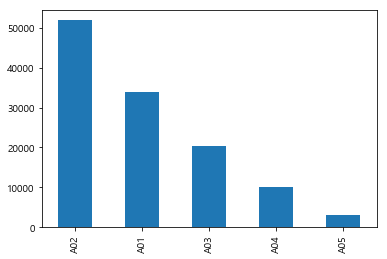

In [181]:
# 여자 연령대별로 많이 이용한 업종
count(F_20, 'BIZ_UNIT.x').plot(kind='bar')

In [45]:
count(F_30, 'BIZ_UNIT.x')

A02    258511
A01    120463
A03    101633
A04     33029
A05      5210
Name: BIZ_UNIT.x, dtype: int64

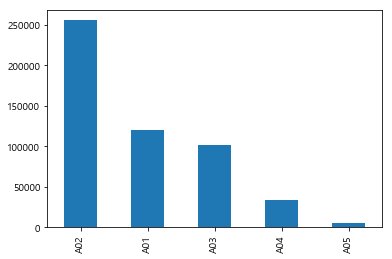

In [182]:
count(F_30, 'BIZ_UNIT.x').plot(kind='bar')

In [46]:
count(F_40, 'BIZ_UNIT.x')

A02    330372
A03    182979
A01    166230
A04     30341
A05      4276
Name: BIZ_UNIT.x, dtype: int64

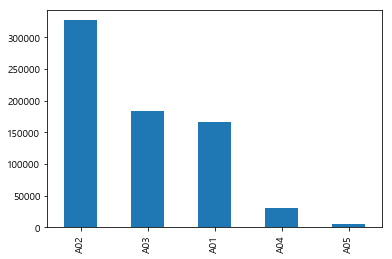

In [183]:
count(F_40, 'BIZ_UNIT.x').plot(kind='bar')

In [47]:
count(F_50, 'BIZ_UNIT.x')

A02    292730
A01    193622
A03    135336
A04     18571
A05      2675
Name: BIZ_UNIT.x, dtype: int64

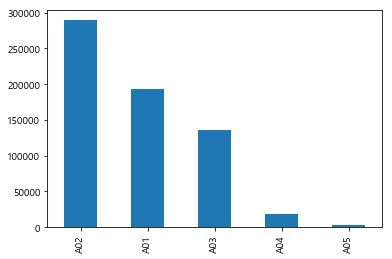

In [184]:
count(F_50, 'BIZ_UNIT.x').plot(kind='bar')

In [48]:
count(F_60, 'BIZ_UNIT.x')

A02    142326
A01    117949
A03     64896
A04      5050
A05      1151
Name: BIZ_UNIT.x, dtype: int64

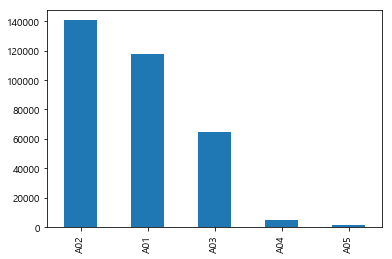

In [185]:
count(F_60, 'BIZ_UNIT.x').plot(kind='bar')

In [49]:
# 남자+여자 연령대별로 많이 이용한 업종
count(total_20, 'BIZ_UNIT.x')

A02    84552
A01    52195
A03    31249
A04    28840
A05     4347
Name: BIZ_UNIT.x, dtype: int64

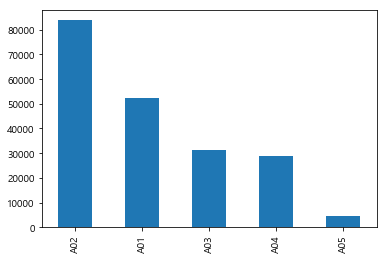

In [186]:
# 남자+여자 연령대별로 많이 이용한 업종
count(total_20, 'BIZ_UNIT.x').plot(kind='bar')

In [50]:
count(total_30, 'BIZ_UNIT.x')

A02    424006
A01    181234
A03    161157
A04     74072
A05      6806
Name: BIZ_UNIT.x, dtype: int64

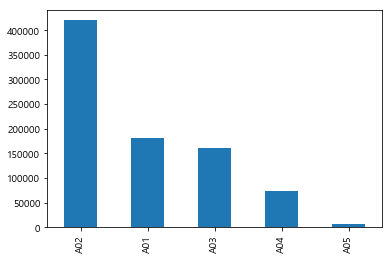

In [187]:
count(total_30, 'BIZ_UNIT.x').plot(kind='bar')

In [51]:
count(total_40, 'BIZ_UNIT.x')

A02    539682
A03    272108
A01    244710
A04     65667
A05      5934
Name: BIZ_UNIT.x, dtype: int64

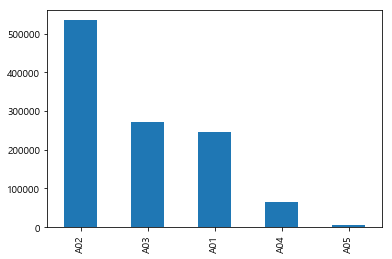

In [188]:
count(total_40, 'BIZ_UNIT.x').plot(kind='bar')

In [52]:
count(total_50, 'BIZ_UNIT.x')

A02    449885
A01    281299
A03    197169
A04     28839
A05      3702
Name: BIZ_UNIT.x, dtype: int64

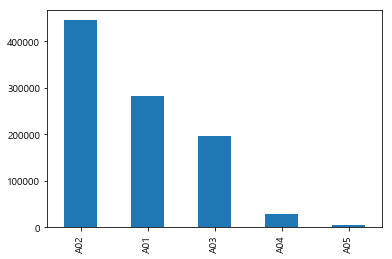

In [189]:
count(total_50, 'BIZ_UNIT.x').plot(kind='bar')

In [53]:
count(total_60, 'BIZ_UNIT.x')

A02    228967
A01    173275
A03     92605
A04      7290
A05      1492
Name: BIZ_UNIT.x, dtype: int64

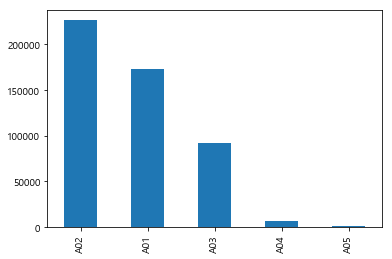

In [190]:
count(total_60, 'BIZ_UNIT.x').plot(kind='bar')

### 1. 월별 총 매출액
### 2. 시간대별 총 매출액(shopping만)
-> 그래프들과 같이 (한 화면에 여러개 그래프 그리기)

In [206]:
## 월별 총 매출액
# shopping
shopping_p = shopping.groupby('DE_DT').sum()['BUY_AM']
shopping.groupby('DE_DT').sum()['BUY_AM']

DE_DT
201501    7234730668
201502    7114202609
201503    7171134603
201504    7427972330
201505    8226190826
201506    6350472575
201507    6882046087
201508    6685597233
201509    7551143035
201510    8497219936
201511    8988656134
201512    8119234294
Name: BUY_AM, dtype: int64

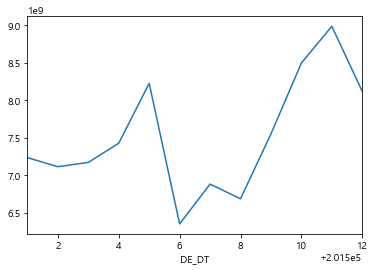

In [101]:
# 그래프
shopping.groupby('DE_DT').sum()['BUY_AM'].plot()

In [204]:
total_20_p = total_20.groupby('DE_DT').sum()['BUY_AM']
# 대부분 10~12월에 판매금액이 급격히 높아지는 경향이 있는데, 30대남자에서는 그런 경향보이지 않음
total_30_p = total_30.groupby('DE_DT').sum()['BUY_AM']
total_40_p = total_40.groupby('DE_DT').sum()['BUY_AM']
total_50_p = total_50.groupby('DE_DT').sum()['BUY_AM']
total_60_p = total_60.groupby('DE_DT').sum()['BUY_AM']

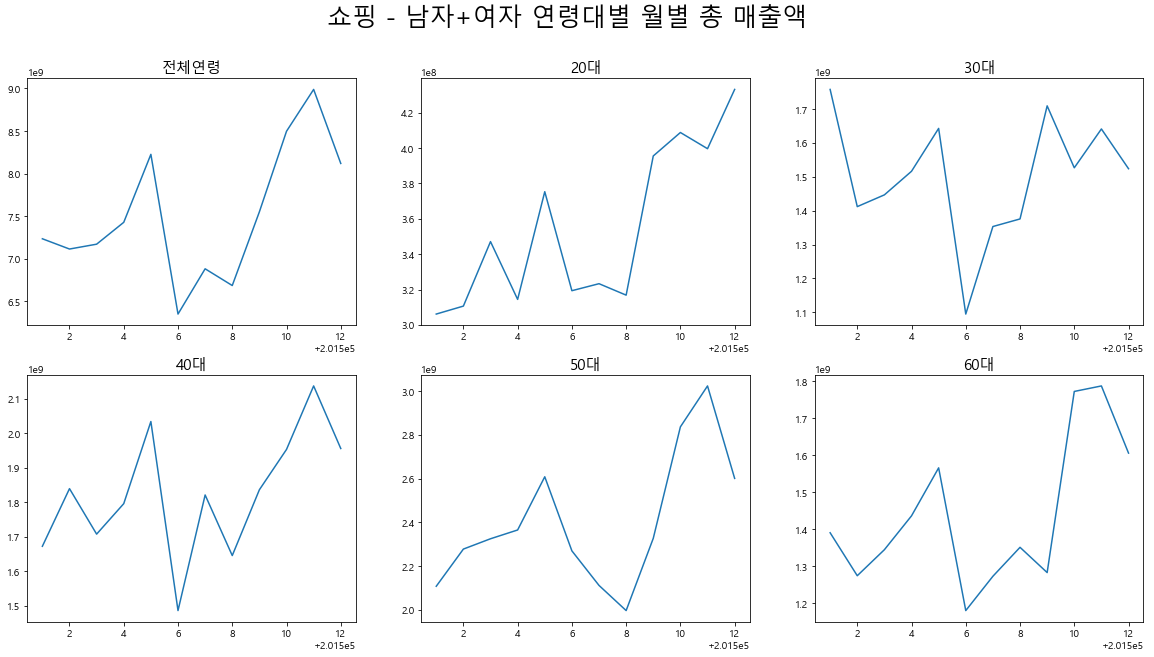

In [208]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑 - 남자+여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(shopping_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(total_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(total_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(total_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(total_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(total_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

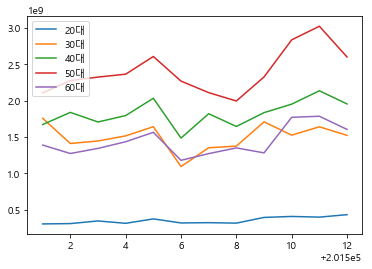

In [259]:
# shopping 남자+여자 연령대별 월별 총 매출액
plt.plot(total_20_p)
plt.plot(total_30_p)
plt.plot(total_40_p)
plt.plot(total_50_p)
plt.plot(total_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])

In [110]:
male_p = male.groupby('DE_DT').sum()['BUY_AM']
m_20_p = M_20.groupby('DE_DT').sum()['BUY_AM']
# 대부분 10~12월에 판매금액이 급격히 높아지는 경향이 있는데, 30대남자에서는 그런 경향보이지 않음
m_30_p = M_30.groupby('DE_DT').sum()['BUY_AM']
m_40_p = M_40.groupby('DE_DT').sum()['BUY_AM']
m_50_p = M_50.groupby('DE_DT').sum()['BUY_AM']
m_60_p = M_60.groupby('DE_DT').sum()['BUY_AM']

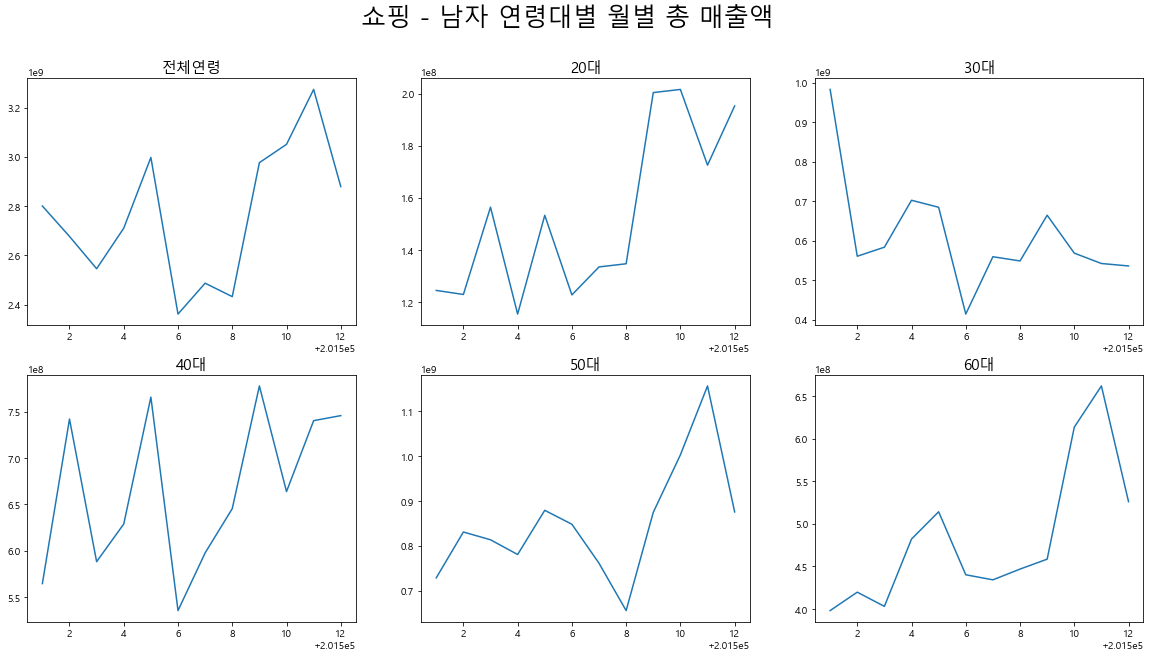

In [199]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑 - 남자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(male_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(m_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(m_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(m_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(m_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(m_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

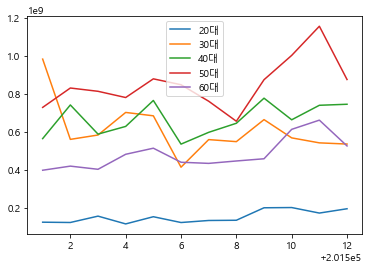

In [260]:
# shopping 남자 연령대별 월별 총 매출액
plt.plot(m_20_p)
plt.plot(m_30_p)
plt.plot(m_40_p)
plt.plot(m_50_p)
plt.plot(m_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])

In [111]:
female_p = female.groupby('DE_DT').sum()['BUY_AM']
f_20_p = F_20.groupby('DE_DT').sum()['BUY_AM']
f_30_p = F_30.groupby('DE_DT').sum()['BUY_AM']
f_40_p = F_40.groupby('DE_DT').sum()['BUY_AM']
f_50_p = F_50.groupby('DE_DT').sum()['BUY_AM']
f_60_p = F_60.groupby('DE_DT').sum()['BUY_AM']

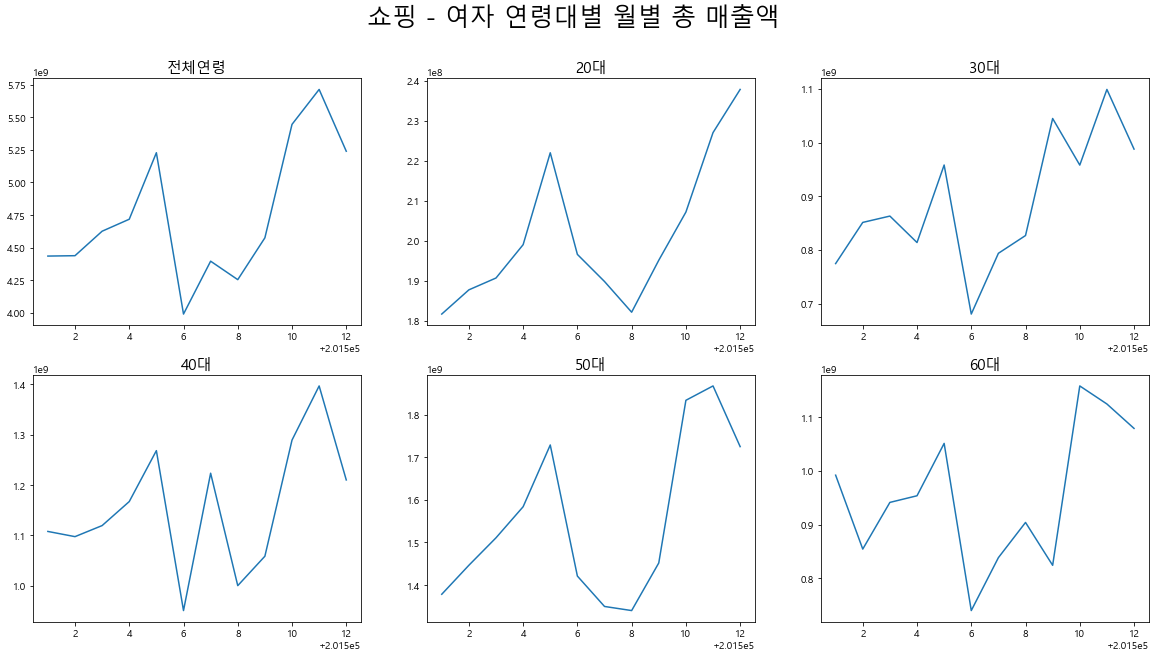

In [198]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑 - 여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(female_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(f_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(f_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(f_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(f_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(f_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

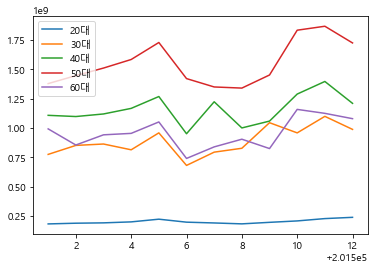

In [261]:
# shopping 여자 연령대별 월별 총 매출액
plt.plot(f_20_p)
plt.plot(f_30_p)
plt.plot(f_40_p)
plt.plot(f_50_p)
plt.plot(f_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])

In [210]:
## 월별 총 매출액
# notshopping
notshopping_p = notshopping.groupby('CRYM').sum()['U_AM']
notshopping.groupby('CRYM').sum()['U_AM']

CRYM
201501    1085095589
201502     972951286
201503     917870767
201504     999787824
201505    1183584634
201506     881285651
201507    1129817676
201508    1225510237
201509     804054911
201510     975923091
201511     927914467
201512    1071782089
Name: U_AM, dtype: int64

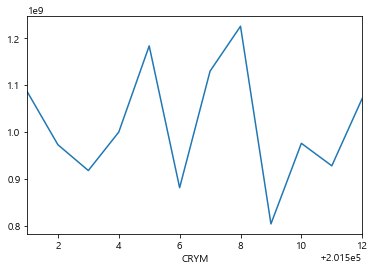

In [48]:
notshopping.groupby('CRYM').sum()['U_AM'].plot()

In [195]:
n_male_p = n_male.groupby('CRYM').sum()['U_AM']
n_m_20_p = n_M_20.groupby('CRYM').sum()['U_AM']
n_m_30_p = n_M_30.groupby('CRYM').sum()['U_AM']
n_m_40_p = n_M_40.groupby('CRYM').sum()['U_AM']
n_m_50_p = n_M_50.groupby('CRYM').sum()['U_AM']
n_m_60_p = n_M_60.groupby('CRYM').sum()['U_AM']

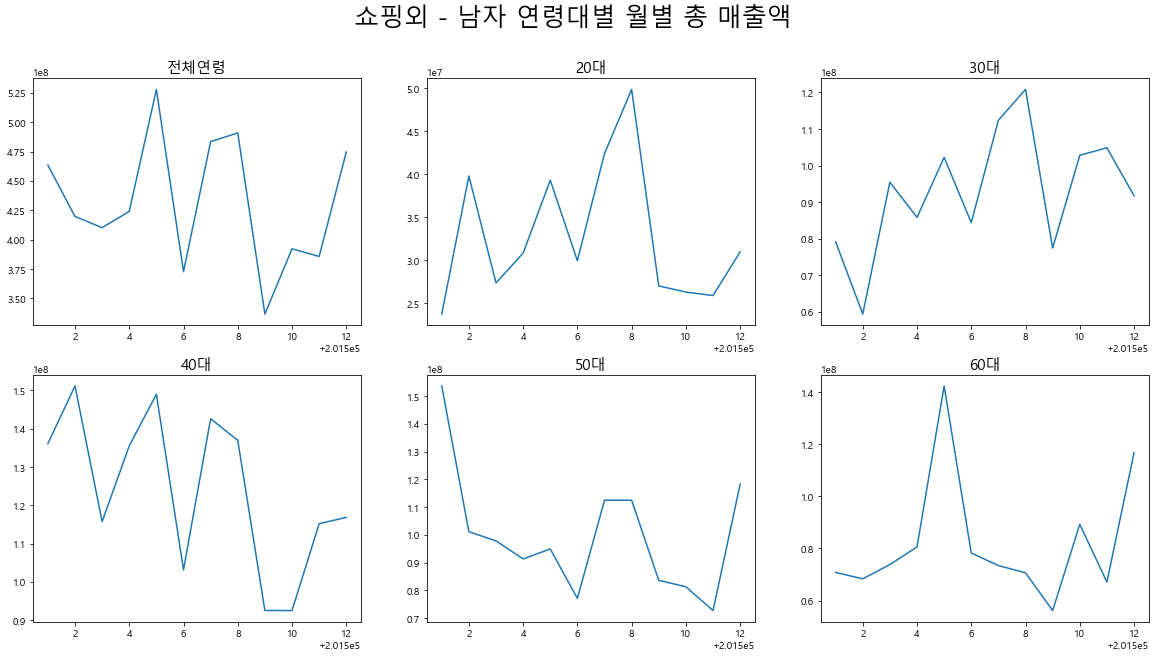

In [197]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑외 - 남자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(n_male_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(n_m_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(n_m_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(n_m_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(n_m_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(n_m_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

In [201]:
n_female_p = n_female.groupby('CRYM').sum()['U_AM']
n_f_20_p = n_F_20.groupby('CRYM').sum()['U_AM']
n_f_30_p = n_F_30.groupby('CRYM').sum()['U_AM']
n_f_40_p = n_F_40.groupby('CRYM').sum()['U_AM']
n_f_50_p = n_F_50.groupby('CRYM').sum()['U_AM']
n_f_60_p = n_F_60.groupby('CRYM').sum()['U_AM']

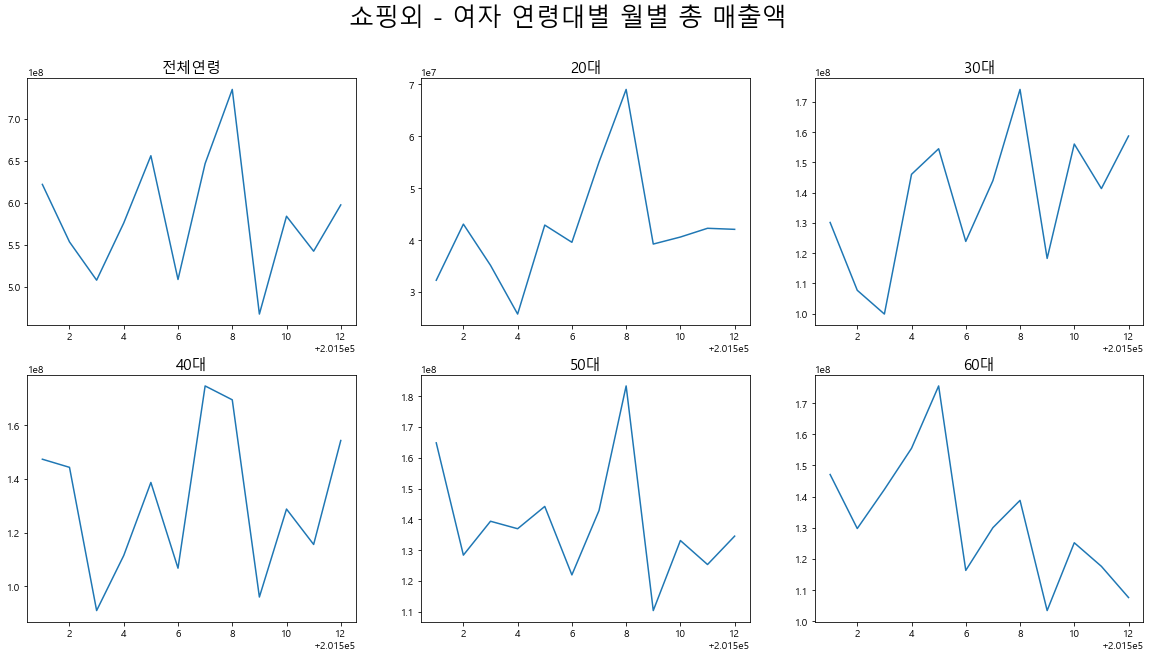

In [202]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑외 - 여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(n_female_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(n_f_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(n_f_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(n_f_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(n_f_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(n_f_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

In [209]:
n_total_20_p = n_total_20.groupby('CRYM').sum()['U_AM']
n_total_30_p = n_total_30.groupby('CRYM').sum()['U_AM']
n_total_40_p = n_total_40.groupby('CRYM').sum()['U_AM']
n_total_50_p = n_total_50.groupby('CRYM').sum()['U_AM']
n_total_60_p = n_total_60.groupby('CRYM').sum()['U_AM']

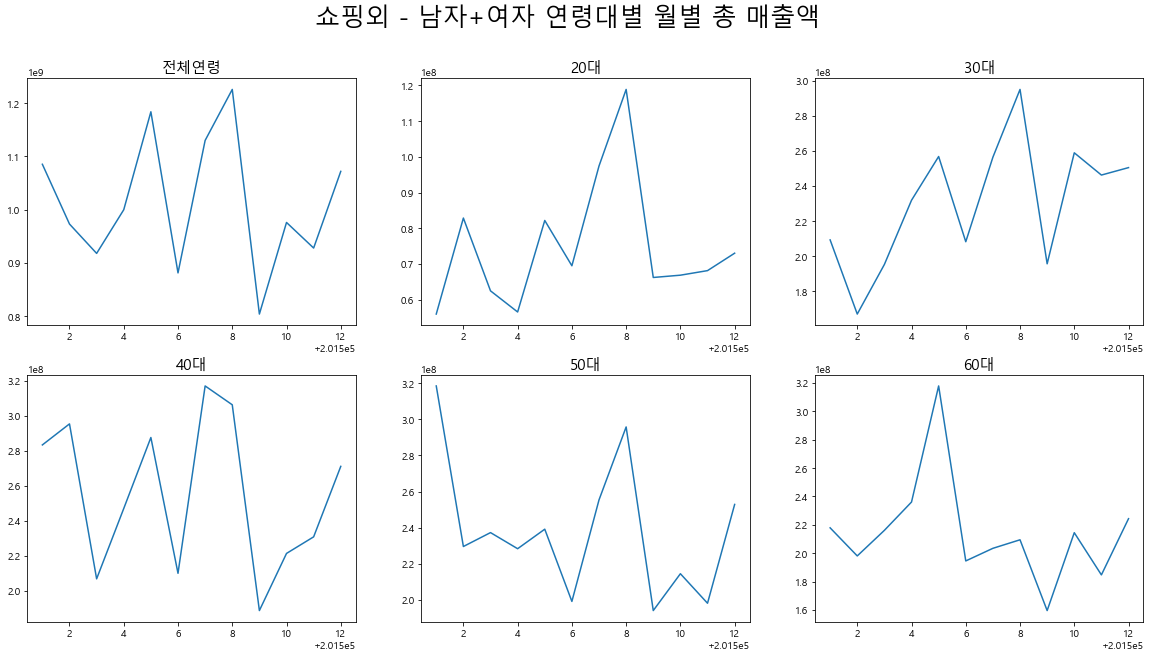

In [212]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑외 - 남자+여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(notshopping_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(n_total_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(n_total_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(n_total_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(n_total_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(n_total_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

In [216]:
## 시간대별 총 매출액
# shopping
# 남자
male.groupby('DE_HR').sum()['BUY_AM']

DE_HR
0       11444388
1        6092460
2        3309140
3        3202230
4        1481140
5        2090680
6        4007425
7        8004036
8       15053360
9       30658561
10     770514498
11    2211881801
12    2503386657
13    2912852230
14    3431515266
15    3754534769
16    3961201953
17    4071696902
18    3411837164
19    3175691769
20    1866380764
21     630549554
22     303560062
23      98072710
Name: BUY_AM, dtype: int64

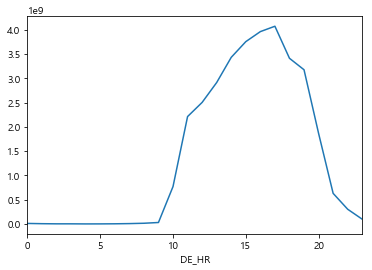

In [229]:
# 남자
male.groupby('DE_HR').sum()['BUY_AM'].plot()

In [230]:
# 여자
female.groupby('DE_HR').sum()['BUY_AM']

DE_HR
0        7449150
1        3686940
2        2632730
3         967160
4        1027760
5        5663420
6        2705814
7        6208200
8       12671460
9       28470779
10    1284048050
11    3960104305
12    4307288062
13    5098204504
14    6164535696
15    7031790301
16    7241356603
17    6583646195
18    5990564678
19    5114895730
20    2701993693
21     909524890
22     462854116
23     137290575
Name: BUY_AM, dtype: int64

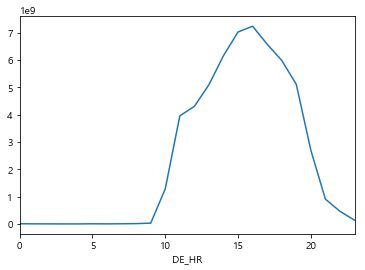

In [231]:
# 여자
female.groupby('DE_HR').sum()['BUY_AM'].plot()

In [232]:
# 남자+여자
shopping.groupby('DE_HR').sum()['BUY_AM']

DE_HR
0        18893538
1         9779400
2         5941870
3         4169390
4         2508900
5         7754100
6         6713239
7        14212236
8        27724820
9        59129340
10     2054562548
11     6171986106
12     6810674719
13     8011056734
14     9596050962
15    10786325070
16    11202558556
17    10655343097
18     9402401842
19     8290587499
20     4568374457
21     1540074444
22      766414178
23      235363285
Name: BUY_AM, dtype: int64

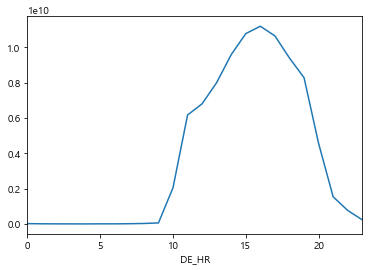

In [233]:
# 남자+여자
shopping.groupby('DE_HR').sum()['BUY_AM'].plot()

=> 시간대별 총 매출액은 성별, 나이대별로 크게 다르지 않음

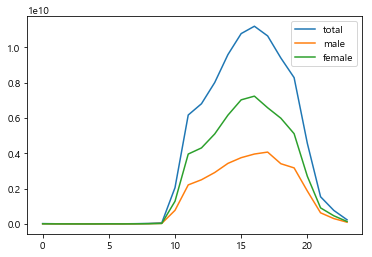

In [252]:
plt.plot(shopping.groupby('DE_HR').sum()['BUY_AM'], label='male+female')
plt.plot(male.groupby('DE_HR').sum()['BUY_AM'], label='male')
plt.plot(female.groupby('DE_HR').sum()['BUY_AM'], label='female')
plt.legend(['total', 'male', 'female'])